# Breast Cancer Classification with Support Vector Machine and Classification Evaluation Metrics

I applied SVM on Breast Cancer in this notebook. I explained the Skewness problem and showed its solution. I examined the results of the model under the title of evaluation metrics and gave information about these metrics. In total, I explained 9 evaluation metrics and showed their calculations.

## Content:

1. [Importing the Necessary Libraries](#1)
1. [Read Datas & Explanation of Features & Information About Datasets](#2)
   1. [Variable Descriptions](#3)
1. [Anomaly Detection](#4)
1. [Skewness](#5)
1. [Correlation](#6)
1. [Label Encoding](#7)
1. [Train-Test Split](#8)
1. [Pipelines](#9)
   1. [Support Vector Machine](#10)   
1. [Evaluation Metrics](#11)
   1. [Confusion Matrix](#12)
   1. [Statistics](#13)
   1. [Classification Report](#14)
   1. [Classification Metrics and Scoring (scikit-learn)](#15)
      1. [Accuracy](#16)
      1. [Balanced Accuracy](#17)
      1. [Top-k Accuracy Score](#18)
      1. [Cohen’s Kappa](#19)
      1. [Average Precision](#20)
      1. [Log Loss](#21)
      1. [Jaccard Similarity Coefficient Score](#22)
1. [Conclusion](#23)   

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

<a id = "1"></a>
# Importing the Necessary Libraries

In [ ]:
import numpy as np 
import pandas as pd
import pandas
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import seaborn as sns; sns.set()

from sklearn import tree
import graphviz 
import os
import preprocessing 

import numpy as np 
import pandas as pd 
from plotly.offline import init_notebook_mode, iplot, plot
import plotly as py
init_notebook_mode(connected=True)
import plotly.graph_objs as go
from wordcloud import WordCloud
import matplotlib.pyplot as plt

from pandas_profiling import ProfileReport

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.model_selection import KFold
from sklearn.feature_selection import SelectFromModel
from sklearn.svm import LinearSVC

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

from sklearn.preprocessing import normalize
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA

from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


import warnings
warnings.filterwarnings("ignore")

<a id = "2"></a>
# Read Datas & Explanation of Features & Information About Datasets

In [ ]:
dataset = pandas.read_csv('/kaggle/input/breast-cancer-wisconsin-data/data.csv')
dataset.sample(10)

In [ ]:
dataset.drop("id", axis=1, inplace=True)
dataset.drop("Unnamed: 32", axis=1, inplace=True)

<a id = "3"></a>
## Variable Descriptions

* diagnosis              --> The diagnosis of breast tissues (M = malignant, B = benign)
* radius_mean            --> mean of distances from center to points on the perimeter
* texture_mean           --> standard deviation of gray-scale values
* perimeter_mean         --> mean size of the core tumor
* area_mean              -->
* smoothness_mean        --> mean of local variation in radius lengths
* compactness_mean       --> mean of perimeter^2 / area - 1.0
* concavity_mean         --> mean of severity of concave portions of the contour
* concave points_mean    --> mean for number of concave portions of the contour
* symmetry_mean          -->
* fractal_dimension_mean --> mean for "coastline approximation" - 1
* radius_se              --> standard error for the mean of distances from center to points on the perimeter
* texture_se             --> standard error for standard deviation of gray-scale values
* perimeter_se           -->
* area_se                -->
* smoothness_se          --> standard error for local variation in radius lengths
* compactness_se         --> standard error for perimeter^2 / area - 1.0
* concavity_se           --> standard error for severity of concave portions of the contour
* concave points_se      --> standard error for number of concave portions of the contour
* symmetry_se            -->
* fractal_dimension_se   --> standard error for "coastline approximation" - 1
* radius_worst           --> "worst" or largest mean value for mean of distances from center to points on the perimeter
* texture_worst          --> "worst" or largest mean value for standard deviation of gray-scale values
* perimeter_worst        -->
* area_worst             -->
* smoothness_worst       --> "worst" or largest mean value for local variation in radius lengths
* compactness_worst      --> "worst" or largest mean value for perimeter^2 / area - 1.0
* concavity_worst        --> "worst" or largest mean value for severity of concave portions of the contour
* concave points_worst   --> "worst" or largest mean value for number of concave portions of the contour
* symmetry_wors          -->
* fractal_dimension_worst--> "worst" or largest mean value for "coastline approximation" - 1

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

<a id = "4"></a>
# Anomaly Detection

Anomaly is one that differs / deviates significantly from other observations in the same sample. An anomaly detection pattern produces two different results. The first is a categorical tag for whether the observation is abnormal or not; the second is a score or trust value. Score carries more information than the label. Because it also tells us how abnormal the observation is. The tag just tells you if it's abnormal. While labeling is more common in supervised methods, the score is more common in unsupervised and semisupervised methods.

In [ ]:
#This code is retrieved from here: https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda#Introduction

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
columns = list(dataset.columns)
columns.remove('diagnosis')

In [ ]:
dataset.loc[detect_outliers(dataset,columns)]

In [ ]:
# drop outliers
dataset = dataset.drop(detect_outliers(dataset,columns),axis = 0).reset_index(drop = True)

In [ ]:
for i in columns:
    dataset = dataset[dataset[i] != 0]

<a id = "5"></a>
# Correlation

In [ ]:
plt.figure(figsize=(12,8)) 
sns.heatmap(dataset.corr(), annot=False, cmap='Set3', linewidths = 2)
plt.show()

In [ ]:
plt.figure(figsize=(20, 10))
sns.set_style('white')
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataset.corr(), mask=mask,annot=False, cmap='Set3', linewidths = 2)
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':30}, pad=16);

<a id = "6"></a>
# Skewness

It can be said that skewness is the name given to the distortion of symmetry in data distribution in continuous or in other words, non-categorical data sets. In other words, it is the criterion of asymmetry. In summary, it is expected that the distribution of the data sets will show a normal distribution, but if the available data is contrary to this, it can be mentioned that the data is skewed. These distortions are among the reasons that prevent some machine learning models from learning from data, similar to the effect of imbalanced datasets used for categorical data.

In the image below, there is a graph showing the number of records belonging to three different data sets. In the data set with a symmetrical distribution as in the green graph, mode median and mean values are equal. In other words, the most frequently found number is both the median number and the average. The situation in the orange graph is expressed as positive skewness, and the situation in the blue graph as negative skewness.

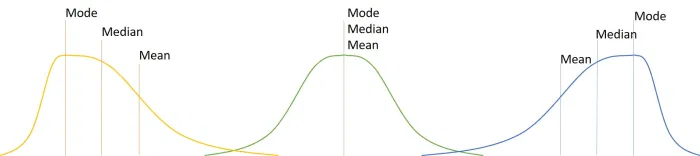

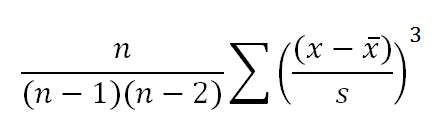

* In the formula, n is the number of samples, xm is the arithmetic mean of the array (sample mean), and 's' is its standard deviation.

* As the value of skewness moves towards plus infinity, the force of negative skewness increases as it moves towards positive and minus infinity.

Source for this explanation: https://teachtomachines.com/2020/07/07/log-donusumu-ile-carpiklik-giderme/

In [ ]:
dataset.agg(['skew'])

In [ ]:
skews = ['area_mean', 'concavity_mean', 'radius_se', 'perimeter_se', 'area_se', 'smoothness_se', 'compactness_se', 'symmetry_se', 'fractal_dimension_se', 'area_worst', 'compactness_worst', 'fractal_dimension_worst' ]

In [ ]:
from scipy.stats import norm, skew, boxcox
for i in skews:
    sns.set_style('darkgrid')
    sns.distplot(dataset[i], fit = norm)
    plt.title('Skeweed')
    plt.show()
    (mu, sigma) = norm.fit(dataset[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()
    
    dataset[i], lam = boxcox(dataset[i])

    sns.set_style('darkgrid')
    sns.distplot(dataset[i], fit = norm)
    plt.title('Transformed')
    plt.show()
    (mu, sigma) = norm.fit(dataset[i])
    print("mu {} : {}, sigma {} : {}".format(i, mu, i, sigma))
    print()

In [ ]:
dataset.agg(['skew', 'kurtosis']).transpose()

<a id = "7"></a>
# Label Encoding

In [ ]:
dataset['diagnosis'].unique()

In [ ]:
diagnosis_mapping = {'M': 0, 'B': 1}
dataset['diagnosis'] = dataset['diagnosis'].map(diagnosis_mapping)

<a id = "8"></a>
# Train - Test Split

In [ ]:
features = columns
label = ['diagnosis']

X = dataset[features]
y = dataset[label]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=101) 
X_valid, X_test, y_valid, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

print(f'Total # of sample in whole dataset: {len(X)}')
print(f'Total # of sample in train dataset: {len(X_train)}')
print(f'Total # of sample in validation dataset: {len(X_valid)}')
print(f'Total # of sample in test dataset: {len(X_test)}')

<a id = "9"></a>
# Pipelines

In [ ]:
pipeline_GaussianNB = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_GaussianNB",GaussianNB())])

pipeline_BernoulliNB = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_BernoulliNB",BernoulliNB())])

pipeline_LogisticRegression = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_LogisticRegression",LogisticRegression())])

pipeline_RandomForest = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_RandomForest",RandomForestClassifier())])

pipeline_SVM = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_SVM",SVC())])

pipeline_DecisionTree = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_DecisionTree",DecisionTreeClassifier())])

pipeline_KNN = Pipeline([("scaler",StandardScaler()),
                     ("pipeline_KNN",KNeighborsClassifier())])

pipeline_GBC = Pipeline([("scaler",StandardScaler()), (
                        "pipeline_GBC",GradientBoostingClassifier())])

pipeline_SGD = Pipeline([("scaler",StandardScaler()), 
                        ("pipeline_SGD",SGDClassifier(max_iter=5000, random_state=0))])

pipeline_NN = Pipeline([("scaler",StandardScaler()), 
                        ("pipeline_NN",MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1))])

pipelines = [pipeline_GaussianNB, pipeline_BernoulliNB, pipeline_LogisticRegression, pipeline_RandomForest, pipeline_SVM, pipeline_DecisionTree, pipeline_KNN, pipeline_GBC, pipeline_SGD, pipeline_NN]

pipe_dict = {0: "GaussianNB", 1: "BernoulliNB", 2: "LogisticRegression",3: "RandomForestClassifier", 4: "SupportVectorMachine", 5: "DecisionTreeClassifier",
            6: "KNeighborsClassifier", 7: "GradientBoostingClassifier", 8:"Stochastic Gradient Descent", 9: "Neural Nets"}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [ ]:
cv_results_acc = []

for i, model in enumerate(pipelines):
    cv_score = cross_val_score(model, X_train, y_train, scoring = "accuracy", cv = 10)
    cv_results_acc.append(cv_score)
    print("%s: %f" % (pipe_dict[i], cv_score.mean()*100))

***NOTE:*** *Thank you to Karnika Kapoor for letting me use her pipeline. The original code is available here:* https://www.kaggle.com/karnikakapoor/diamond-price-prediction/comments

<a id = "10"></a>
# Support Vector Machine

In [ ]:
train_score = pipeline_SVM.score(X_train, y_train)
print(f'Train score of trained model     : {train_score*100}')

validation_score = pipeline_SVM.score(X_valid, y_valid)
print(f'Validation score of trained model: {validation_score*100}')

test_score = pipeline_SVM.score(X_test, y_test)
print(f'Test score of trained model      : {test_score*100}')

In [ ]:
pred = pipeline_SVM.predict(X_test)

<a id = "11"></a>
# Evaluation Metrics

<a id = "12"></a>
## Confusion Matrix

Confusion matrix is a measurement tool that provides information about the accuracy of predictions. The logic behind it is actually simple, but it is often used especially in classification algorithms as it provides easy to understand information about the accuracy of the measurement.

In [ ]:
conf_matrix = confusion_matrix(pred, y_test)

print(f'Confussion Matrix: \n{conf_matrix}\n')

sns.heatmap(conf_matrix, annot=True)

<a id = "13"></a>
## Performance Measures

**TP - True Positive:** The model correctly predicted the positive class as a positive class.

**FP - False Positive:** The model predicted the negative class as a false positive class.

**FN - False Negative:** The model predicted the positive class as false, negative class.

**TN - True Negative:** The model predicted the negative class correctly.

In [ ]:
tn = conf_matrix[0,0]
fp = conf_matrix[0,1]
tp = conf_matrix[1,1]
fn = conf_matrix[1,0]

total = tn + fp + tp + fn
real_positive = tp + fn
real_negative = tn + fp

**Accuracy Rate:** A measure of how often the classifier predicts correctly.

**Precision:** It shows how many of the values we guess as Positive are actually Positive.

**Recall:** It is a measure of how much the classifier correctly predicts the true positive value. Also known as Sensitivity, Accuracy or Recall. (Sensitivity, Hit Rate or Recall) It should be as high as possible.

**F1 Score:** F1 Score value shows the harmonic mean of Precision and Recall values. The reason why it is a harmonic average instead of a simple average is that we should not ignore extreme cases. If there was a simple average calculation, the F1 Score of a model with a Precision value of 1 and a Recall value of 0 would come as 0.5, and this would mislead us.

**Specificity:** It is a measure of how much the classifier correctly predicted the true negative value.

**Misclassification Rate (Error Rate):** It is a measure of how often the classifier guesses incorrectly. Also known as Error Rate.

**Prevalence:** It is the measure of how often a value of 1 is found at the end of the estimation.

**Miss Rate:** It is the ratio of those predicted to be 0 despite the real value being 1. Also known as loss rate.

**Fall out:** It is the ratio of those predicted to be 1 even though the real value is 0.

In [ ]:
accuracy  = (tp + tn) / total # Accuracy Rate
precision = tp / (tp + fp) # Positive Predictive Value
recall    = tp / (tp + fn) # True Positive Rate
f1score  = 2 * precision * recall / (precision + recall)
specificity = tn / (tn + fp) # True Negative Rate
error_rate = (fp + fn) / total # Missclassification Rate
prevalence = real_positive / total
miss_rate = fn / real_positive # False Negative Rate
fall_out = fp / real_negative # False Positive Rate

print(f'Accuracy    : {accuracy}')
print(f'Precision   : {precision}')
print(f'Recall      : {recall}')
print(f'F1 score    : {f1score}')
print(f'Specificity : {specificity}')
print(f'Error Rate  : {error_rate}')
print(f'Prevalence  : {prevalence}')
print(f'Miss Rate   : {miss_rate}')
print(f'Fall Out    : {fall_out}')

<a id = "14"></a>
## Classification Report

In [ ]:
print(classification_report(pred, y_test))

<a id = "15"></a>
## Classification Metrics and Scoring (scikit-learn)

**NOTE:** This explanations and formulas were taken from scikit-learn library documentation. You can access documentation via this link: https://scikit-learn.org/stable/modules/model_evaluation.html#jaccard-similarity-coefficient-score

<a id = "16"></a>
### Accuracy

Accuracy classification score.

In multilabel classification, this function computes subset accuracy: the set of labels predicted for a sample must exactly match the corresponding set of labels in y_true.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext mathvariant="monospace">accuracy</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow>
    <mover>
      <mi>y</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>n</mi>
      <mtext>samples</mtext>
    </msub>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow>
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow>
      <msub>
        <mi>n</mi>
        <mtext>samples</mtext>
      </msub>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </munderover>
  <mn>1</mn>
  <mo stretchy="false">(</mo>
  <msub>
    <mrow>
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mo>=</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math>

In [ ]:
print("accuracy           :", metrics.accuracy_score(y_test, pred)*100)

<a id = "17"></a>
### Balanced Accuracy

The balanced accuracy in binary and multiclass classification problems to deal with imbalanced datasets. It is defined as the average of recall obtained on each class.

The best value is 1 and the worst value is 0.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext mathvariant="monospace">balanced-accuracy</mtext>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <mn>2</mn>
  </mfrac>
  <mrow data-mjx-texclass="INNER">
    <mo data-mjx-texclass="OPEN">(</mo>
    <mfrac>
      <mrow>
        <mi>T</mi>
        <mi>P</mi>
      </mrow>
      <mrow>
        <mi>T</mi>
        <mi>P</mi>
        <mo>+</mo>
        <mi>F</mi>
        <mi>N</mi>
      </mrow>
    </mfrac>
    <mo>+</mo>
    <mfrac>
      <mrow>
        <mi>T</mi>
        <mi>N</mi>
      </mrow>
      <mrow>
        <mi>T</mi>
        <mi>N</mi>
        <mo>+</mo>
        <mi>F</mi>
        <mi>P</mi>
      </mrow>
    </mfrac>
    <mo data-mjx-texclass="CLOSE">)</mo>
  </mrow>
</math>

In [ ]:
print("balanced_accuracy  :", metrics.balanced_accuracy_score(y_test, pred))

<a id = "18"></a>
### Top-k Accuracy Score

This metric computes the number of times where the correct label is among the top k labels predicted (ranked by predicted scores). Note that the multilabel case isn’t covered here.

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext mathvariant="monospace">top-k accuracy</mtext>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>,</mo>
  <mrow>
    <mover>
      <mi>f</mi>
      <mo stretchy="false">^</mo>
    </mover>
  </mrow>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mn>1</mn>
    <msub>
      <mi>n</mi>
      <mtext>samples</mtext>
    </msub>
  </mfrac>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow>
      <mi>i</mi>
      <mo>=</mo>
      <mn>0</mn>
    </mrow>
    <mrow>
      <msub>
        <mi>n</mi>
        <mtext>samples</mtext>
      </msub>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </munderover>
  <munderover>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mrow>
      <mi>j</mi>
      <mo>=</mo>
      <mn>1</mn>
    </mrow>
    <mrow>
      <mi>k</mi>
    </mrow>
  </munderover>
  <mn>1</mn>
  <mo stretchy="false">(</mo>
  <msub>
    <mrow>
      <mover>
        <mi>f</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mrow>
      <mi>i</mi>
      <mo>,</mo>
      <mi>j</mi>
    </mrow>
  </msub>
  <mo>=</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo stretchy="false">)</mo>
</math>

In [ ]:
print("top_k_accuracy     :", metrics.top_k_accuracy_score(y_test, pred)*100)

<a id = "19"></a>
### Cohen’s Kappa

The function cohen_kappa_score computes Cohen’s kappa statistic. This measure is intended to compare labelings by different human annotators, not a classifier versus a ground truth.

The kappa score (see docstring) is a number between -1 and 1. Scores above .8 are generally considered good agreement; zero or lower means no agreement (practically random labels).

In [ ]:
print("Cohen’s Kappa      :", metrics.cohen_kappa_score(y_test, pred))

<a id = "20"></a>
### Average Precision

AP summarizes a precision-recall curve as the weighted mean of precisions achieved at each threshold, with the increase in recall from the previous threshold used as the weight:

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mtext>AP</mtext>
  <mo>=</mo>
  <munder>
    <mo data-mjx-texclass="OP">&#x2211;</mo>
    <mi>n</mi>
  </munder>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>R</mi>
    <mi>n</mi>
  </msub>
  <mo>&#x2212;</mo>
  <msub>
    <mi>R</mi>
    <mrow>
      <mi>n</mi>
      <mo>&#x2212;</mo>
      <mn>1</mn>
    </mrow>
  </msub>
  <mo stretchy="false">)</mo>
  <msub>
    <mi>P</mi>
    <mi>n</mi>
  </msub>
</math>

where <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>P</mi>
    <mi>n</mi>
  </msub>
</math> and <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>R</mi>
    <mi>n</mi>
  </msub>
</math> are the precision and recall at the nth threshold. This implementation is not interpolated and is different from computing the area under the precision-recall curve with the trapezoidal rule, which uses linear interpolation and can be too optimistic.

In [ ]:
print("average_precision  :", metrics.average_precision_score(y_test, pred)*100)

<a id = "21"></a>
### Log Loss

Log loss, aka logistic loss or cross-entropy loss.

This is the loss function used in (multinomial) logistic regression and extensions of it such as neural networks, defined as the negative log-likelihood of a logistic model that returns y_pred probabilities for its training data y_true. The log loss is only defined for two or more labels. For a single sample with true label <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>y</mi>
  <mo>&#x2208;</mo>
  <mo fence="false" stretchy="false">{</mo>
  <mn>0</mn>
  <mo>,</mo>
  <mn>1</mn>
  <mo fence="false" stretchy="false">}</mo>
</math> and a probability estimate <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>p</mi>
  <mo>=</mo>
  <mi>Pr</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
</math>, the log loss is:


<math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>p</mi>
  <mo>=</mo>
  <mi>Pr</mi>
  <mo data-mjx-texclass="NONE">&#x2061;</mo>
  <mo stretchy="false">(</mo>
  <mi>y</mi>
  <mo>=</mo>
  <mn>1</mn>
  <mo stretchy="false">)</mo>
</math>

In [ ]:
print("neg_log_loss       :", metrics.log_loss(y_test, pred)*100)

<a id = "22"></a>
### Jaccard Similarity Coefficient Score

The Jaccard index, or Jaccard similarity coefficient, defined as the size of the intersection divided by the size of the union of two label sets, is used to compare set of predicted labels for a sample to the corresponding set of labels in y_true.

The Jaccard similarity coefficient of the <math xmlns="http://www.w3.org/1998/Math/MathML">
  <mi>i</mi>
</math>-th samples, with a ground truth label set <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
</math>
 and predicted label set <math xmlns="http://www.w3.org/1998/Math/MathML">
  <msub>
    <mrow>
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
</math>
, is defined as

<math xmlns="http://www.w3.org/1998/Math/MathML" display="block">
  <mi>J</mi>
  <mo stretchy="false">(</mo>
  <msub>
    <mi>y</mi>
    <mi>i</mi>
  </msub>
  <mo>,</mo>
  <msub>
    <mrow>
      <mover>
        <mi>y</mi>
        <mo stretchy="false">^</mo>
      </mover>
    </mrow>
    <mi>i</mi>
  </msub>
  <mo stretchy="false">)</mo>
  <mo>=</mo>
  <mfrac>
    <mrow>
      <mo stretchy="false">|</mo>
      <msub>
        <mi>y</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x2229;</mo>
      <msub>
        <mrow>
          <mover>
            <mi>y</mi>
            <mo stretchy="false">^</mo>
          </mover>
        </mrow>
        <mi>i</mi>
      </msub>
      <mo stretchy="false">|</mo>
    </mrow>
    <mrow>
      <mo stretchy="false">|</mo>
      <msub>
        <mi>y</mi>
        <mi>i</mi>
      </msub>
      <mo>&#x222A;</mo>
      <msub>
        <mrow>
          <mover>
            <mi>y</mi>
            <mo stretchy="false">^</mo>
          </mover>
        </mrow>
        <mi>i</mi>
      </msub>
      <mo stretchy="false">|</mo>
    </mrow>
  </mfrac>
  <mo>.</mo>
</math>

In [ ]:
print("jaccard            :", metrics.jaccard_score(y_test, pred)*100)

<a id = "23"></a>
# Conclusion

I tried to explain classification evaluation metrics.

* Quotations are indicated by links.
* If you have questions, please comment them. I will try to explain if you don't understand.
* If you liked this notebook, please let me know :)

Thank you for your time.